## Analyse ABES embeddings - 16/05/2023

# Set project

## Import packages

In [1]:
# Import librairies
import os
import re

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from utils_metrics import *
from utils_visualization import *

[nltk_data] Downloading package words to /home/aurelie/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/aurelie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/aurelie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
# Suppression des FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

### Graphical parameters

In [3]:
# Parametres graphiques
%matplotlib inline
rcParams = {
    'font.size': 14,
    'font.family':'sans-serif',
    'font.sans-serif':['Liberation Sans'],
    'axes.labelsize': 14,
    'legend.fontsize': 12,
    'axes.titlesize': 14,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    'figure.max_open_warning': 30}

sns.set(rc=rcParams)
sns.set_style(
    "whitegrid", {
        'axes.edgecolor': 'k',
        'axes.linewidth': 1,
        'axes.grid': True,
        'xtick.major.width': 1,
        'ytick.major.width': 1
        })

sns.set_context(
    "notebook",
    font_scale=1.1,
    rc={"lines.linewidth": 1.5})

pd.set_option('display.max_columns', None)

### Paths

In [4]:
# Set paths
path = "."
os.chdir(path)
data_path = path + "/data"
data_path_embed = "/home/aurelie/ABES/labo-indexation-ai/data/embeddings"
output_path = path + "/outputs"
fig_path = path + "/figs"

# Import data

In [5]:
# Original dataset
dataset = "working_data_sans_dewey.pkl"
rameau_file = "./extraction/liste_concepts_rameau_sans_vedetteConstruites.csv"
embedding = "test_cbd_100_quadra_3.csv"

## Check Files

In [6]:
# Import rameau list
ram = pd.read_csv(os.path.join(data_path, rameau_file), encoding="latin-1")
print("Nombre de notices différentes: ", ram.shape[0])
ram.head(10)

Nombre de notices différentes:  85876


,PPN,NOM
0,157992527,Kirp?n
1,110140494,Militaires artistes
2,028492161,Militaires romains
3,028521757,Militaires prussiens
4,029895561,Sa-skya-pa
5,031875459,Militaires réunionnais
6,032370083,Construction à l'épreuve de la sécheresse
7,032878117,Missionnaires suisses
8,034423982,Militaires ivoiriens
9,034686940,Outils à métaux


In [7]:
# Import dataset
df = pd.read_pickle(os.path.join(data_path, dataset))
df["PPN"] = df["PPN"].astype(str)
print("Dimension of the dataset: ", df.shape)
df.head()

Dimension of the dataset:  (154508, 9)


,PPN,TITRE,RESUME,RAMEAU,DEWEY,DESCR,presence_chaine_indexation,rameau_chaines_index,rameau_concepts
0,000002364,La culture pour vivre,Mort de la culture populaire en France. Mutati...,Culture populaire;Diffusion de la culture;Poli...,840,La culture pour vivre Mort de la culture popul...,False,"[Culture populaire, Diffusion de la culture, P...","[Culture populaire, Diffusion de la culture, P..."
1,000014877,"La nuit, le jour : essai psychanalytique sur l...","Discontinuité, latence, rétablissement d’une c...",Complexe de castration;Psychanalyse;Rêves,154.63,"La nuit, le jour : essai psychanalytique sur l...",False,"[Complexe de castration, Psychanalyse, Rêves]","[Complexe de castration, Psychanalyse, Rêves]"
2,000021857,"Ruptures, cultures","Il faut imaginer Robinson sur son île, au mome...",Culture,840,"Ruptures, cultures Il faut imaginer Robinson s...",False,[Culture],[Culture]
3,00002564X,La révolution structurale,"Mutations ou crises, les brusques accès de fiè...",Structuralisme,100,"La révolution structurale Mutations ou crises,...",False,[Structuralisme],[Structuralisme]
4,000026352,La Destruction du temple,"Oswald tire sur Kennedy. Jusque-là, c'est bon,...",Science-fiction américaine -- Traductions fran...,830,La Destruction du temple Oswald tire sur Kenne...,True,[Science-fiction américaine -- Traductions fra...,"[Science-fiction américaine, Traductions franç..."


In [8]:
# Check import for embeddings
emb = pd.read_csv(
    os.path.join(data_path_embed, embedding))

emb["autorite_rameau"] = emb["label"].apply(lambda x: re.split(' -- ', str(x)))
emb.head(20)

,ppn,score,label,autorite_rameau
0,000308838,0.727666,État,[État]
1,000308838,0.722907,Administration publique,[Administration publique]
2,000308838,0.713661,Fédéralisme,[Fédéralisme]
3,000308838,0.712745,Fonctionnaires,[Fonctionnaires]
4,000308838,0.705568,Fonction publique,[Fonction publique]
5,000308838,0.704855,Administration,[Administration]
6,00094758X,0.784216,Dollar américain,[Dollar américain]
7,00094758X,0.740926,Système monétaire international,[Système monétaire international]
8,00094758X,0.740794,Convertibilité monétaire,[Convertibilité monétaire]
9,00094758X,0.713842,Marché monétaire,[Marché monétaire]


In [9]:
def flatten(list):
    flat_list = [item for sublist in list for item in sublist]
    return flat_list

In [10]:
keywords = flatten(emb["autorite_rameau"])
chaines = emb["label"].unique()
print(f"Le dataset contient: \n - {len(set(keywords))} autorités RAMEAU differentes \n - {len(chaines)} chaines d'indexation différentes")

Le dataset contient: 
 - 553 autorités RAMEAU differentes 
 - 576 chaines d'indexation différentes


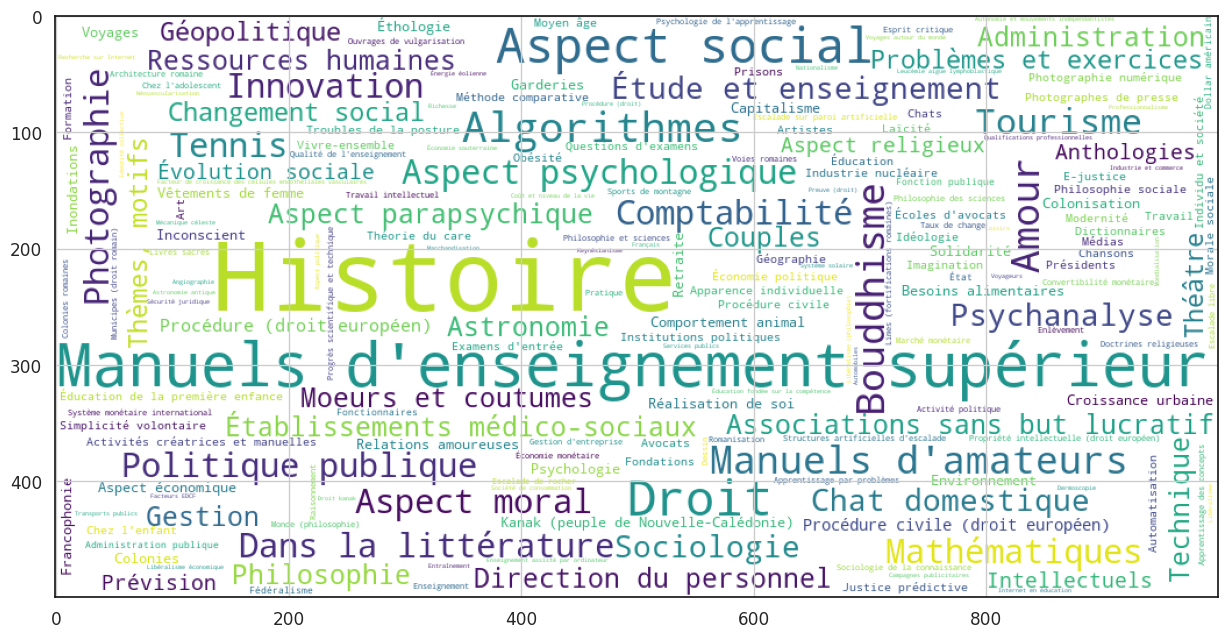

In [11]:
# Get list of labels
plot_wordcloud(
    keywords,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_embeddings_autorites.png",
)

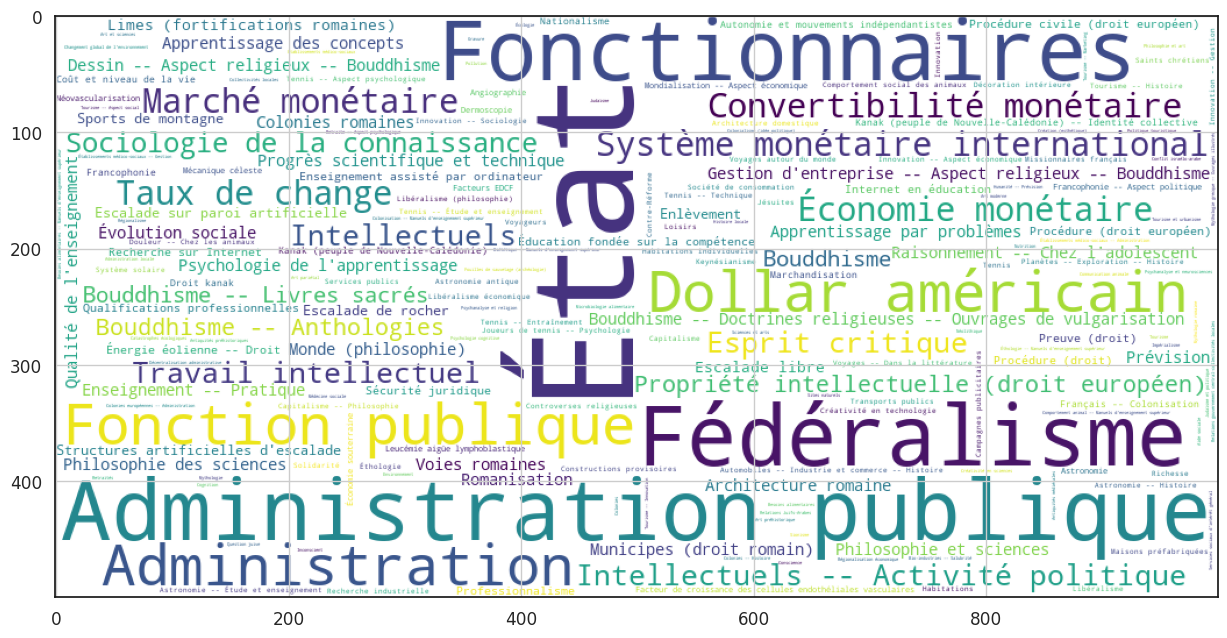

In [12]:
# Get list of chaines
plot_wordcloud(
    chaines,
    backgound_color="white",
    figsize=(15, 8),
    width=1000,
    height=500,
    save_file="wordcloud_embeddings_chaines.png",
)

In [13]:
# check that all labels belongs to rameau
# Verification que toutes les vedettes appartiennent au referenciel RAMEAU
RAMEAU = ram["NOM"].to_list()

if all([item in RAMEAU for item in keywords]):
    print("Tous les mots clés sont des concepts rameau")
else:
    check = [item in RAMEAU for item in keywords]
    bad_keywords = []
    for i in range(len(check)):
        if not check[i]:
            bad_keywords.append(keywords[i])
 
    unknown_concepts = list(set(bad_keywords))
    print(f"{len(unknown_concepts)} mots clés absents du répertoire RAMEAU sur un total de {len(set(keywords))}")
    

26 mots clés absents du répertoire RAMEAU sur un total de 553


In [14]:
# Save list of badly formatted concepts, for check
with open(os.path.join(data_path, "concepts_a_verifier_embeddingfile.txt"), "w") as output:
    output.write(str(unknown_concepts))
unknown_concepts

['Chansons françaises',
 'Roman suédois',
 "Examens d'entrée",
 'Entretiens',
 'Aspect psychologique',
 "Manuels d'enseignement secondaire (Premier cycle)",
 'Exploration',
 'Chansons',
 'Dictionnaires',
 "Manuels d'amateurs",
 'Anthologies',
 'Littérature courtoise',
 'Aspect religieux',
 'Problèmes et exercices',
 'Ouvrages illustrés',
 'Jurisprudence',
 "Manuels d'enseignement secondaire (Deuxième cycle)",
 "Questions d'examens",
 'Ouvrages de vulgarisation',
 'Ouvrages humoristiques',
 'Anecdotes',
 ' 1793-1794)',
 'Bandes dessinées',
 "Manuels d'enseignement supérieur",
 'Dessin',
 'Colonnes infernales (Guerre de Vendée ']

## Compute all labels for all notices

In [15]:
chains_emb = pd.DataFrame(emb.groupby("ppn")["label"].apply(lambda x: ','.join(x).split(","))).reset_index()
chains_emb

,ppn,label
0,000308838,"[État, Administration publique, Fédéralisme, F..."
1,00094758X,"[Dollar américain, Système monétaire internati..."
2,003632806,"[Intellectuels -- Activité politique, Intellec..."
3,047450037,"[Bouddhisme -- Anthologies, Bouddhisme -- Livr..."
4,05224170X,"[Apprentissage par problèmes, Psychologie de l..."
...,...,...
95,266197809,"[Moyen âge, Moeurs et coutumes -- Histoire, Mu..."
96,26753177X,"[Algorithmes, Algorithmes -- Droit, Algorithme..."
97,267884575,"[Philosophie sociale, Société post-industriell..."
98,268799458,"[Posture, Troubles de la posture, Formateurs (..."


In [16]:
chains_emb["autorite"] = chains_emb["label"].apply(lambda x: flatten([y.split(' -- ') for y in x]))
chains_emb.rename(columns = {"ppn": "PPN", "label": "embedding_chains", "autorite": "embeddings_autorites"}, inplace=True)
chains_emb

,PPN,embedding_chains,embeddings_autorites
0,000308838,"[État, Administration publique, Fédéralisme, F...","[État, Administration publique, Fédéralisme, F..."
1,00094758X,"[Dollar américain, Système monétaire internati...","[Dollar américain, Système monétaire internati..."
2,003632806,"[Intellectuels -- Activité politique, Intellec...","[Intellectuels, Activité politique, Intellectu..."
3,047450037,"[Bouddhisme -- Anthologies, Bouddhisme -- Livr...","[Bouddhisme, Anthologies, Bouddhisme, Livres s..."
4,05224170X,"[Apprentissage par problèmes, Psychologie de l...","[Apprentissage par problèmes, Psychologie de l..."
...,...,...,...
95,266197809,"[Moyen âge, Moeurs et coutumes -- Histoire, Mu...","[Moyen âge, Moeurs et coutumes, Histoire, Musi..."
96,26753177X,"[Algorithmes, Algorithmes -- Droit, Algorithme...","[Algorithmes, Algorithmes, Droit, Algorithmes,..."
97,267884575,"[Philosophie sociale, Société post-industriell...","[Philosophie sociale, Société post-industriell..."
98,268799458,"[Posture, Troubles de la posture, Formateurs (...","[Posture, Troubles de la posture, Formateurs (..."


In [17]:
flatten(chains_emb["embedding_chains"])

['État',
 'Administration publique',
 'Fédéralisme',
 'Fonctionnaires',
 'Fonction publique',
 'Administration',
 'Dollar américain',
 'Système monétaire international',
 'Convertibilité monétaire',
 'Marché monétaire',
 'Taux de change',
 'Économie monétaire',
 'Intellectuels -- Activité politique',
 'Intellectuels',
 'Travail intellectuel',
 'Esprit critique',
 'Sociologie de la connaissance',
 'Propriété intellectuelle (droit européen)',
 'Bouddhisme -- Anthologies',
 'Bouddhisme -- Livres sacrés',
 'Bouddhisme',
 'Bouddhisme -- Doctrines religieuses -- Ouvrages de vulgarisation',
 "Gestion d'entreprise -- Aspect religieux -- Bouddhisme",
 'Dessin -- Aspect religieux -- Bouddhisme',
 'Apprentissage par problèmes',
 "Psychologie de l'apprentissage",
 "Raisonnement -- Chez l'adolescent",
 'Apprentissage des concepts',
 "Qualité de l'enseignement",
 'Enseignement -- Pratique',
 'Philosophie des sciences',
 'Philosophie et sciences',
 'Prévision',
 'Progrès scientifique et technique',
 

## Export data

In [18]:
# save to csv
chains_emb.to_csv(os.path.join(data_path_embed, "embeddings_results.csv"))

## Merge Sudoc et embeddings

In [19]:
# Check notices extraction 
df = df.merge(chains_emb, on="PPN", how="inner")
print("Dimension after merge: ", df.shape)
df.head()

Dimension after merge:  (100, 11)


,PPN,TITRE,RESUME,RAMEAU,DEWEY,DESCR,presence_chaine_indexation,rameau_chaines_index,rameau_concepts,embedding_chains,embeddings_autorites
0,000308838,Les sommets de l'État : essai sur l'élite du p...,"u XIXe siècle à nos jours, l'Etat ""fort"" à la ...",Bureaucratie;Classes dirigeantes;Classes dirig...,,Les sommets de l'État : essai sur l'élite du p...,False,"[Bureaucratie, Classes dirigeantes, Classes di...","[Bureaucratie, Classes dirigeantes, Classes di...","[État, Administration publique, Fédéralisme, F...","[État, Administration publique, Fédéralisme, F..."
1,00094758X,Le dollar,"La quatrième de couverture indique : ""Quelle e...",Dollar américain;Finances internationales;Poli...,320,Le dollar La quatrième de couverture indique :...,False,"[Dollar américain, Finances internationales, P...","[Dollar américain, Finances internationales, P...","[Dollar américain, Système monétaire internati...","[Dollar américain, Système monétaire internati..."
2,003632806,Les intellectuels sous la Ve République : 1958...,"Célèbres, influents, on les voit, on en parle ...",Intellectuels;Intellectuels français,301,Les intellectuels sous la Ve République : 1958...,False,"[Intellectuels, Intellectuels français]","[Intellectuels, Intellectuels français]","[Intellectuels -- Activité politique, Intellec...","[Intellectuels, Activité politique, Intellectu..."
3,047450037,"Bouddha, bouddhisme","La 4e de couv. indique : ""Ce petit livre répon...",Bouddhisme,294.3,"Bouddha, bouddhisme La 4e de couv. indique : ""...",False,[Bouddhisme],[Bouddhisme],"[Bouddhisme -- Anthologies, Bouddhisme -- Livr...","[Bouddhisme, Anthologies, Bouddhisme, Livres s..."
4,05224170X,Apprendre à aimer les mathématiques : conditio...,"Les entretiens d'élèves et d'enseignants, anal...",Mathématiques -- Étude et enseignement -- Aspe...,370,Apprendre à aimer les mathématiques : conditio...,True,[Mathématiques -- Étude et enseignement -- Asp...,"[Mathématiques, Étude et enseignement, Aspect ...","[Apprentissage par problèmes, Psychologie de l...","[Apprentissage par problèmes, Psychologie de l..."


In [20]:
all_index_chain = flatten(df["rameau_chaines_index"] + df["embedding_chains"])
all_concepts = flatten(df["rameau_concepts"] + df["embeddings_autorites"])
print(f"Le dataset contient:\n - {len(set(all_index_chain))} chaines d'indexation différentes\n - {len(set(all_concepts))} autorités RAMEAU différentes")

Le dataset contient:
 - 716 chaines d'indexation différentes
 - 665 autorités RAMEAU différentes


In [21]:
all_concepts

['Bureaucratie',
 'Classes dirigeantes',
 'Classes dirigeantes',
 'Hauts fonctionnaires',
 'Hommes politiques',
 'Pouvoir (sciences sociales)',
 'Pratiques politiques',
 'État',
 'Administration publique',
 'Fédéralisme',
 'Fonctionnaires',
 'Fonction publique',
 'Administration',
 'Dollar américain',
 'Finances internationales',
 'Politique monétaire',
 'Dollar américain',
 'Système monétaire international',
 'Convertibilité monétaire',
 'Marché monétaire',
 'Taux de change',
 'Économie monétaire',
 'Intellectuels',
 'Intellectuels français',
 'Intellectuels',
 'Activité politique',
 'Intellectuels',
 'Travail intellectuel',
 'Esprit critique',
 'Sociologie de la connaissance',
 'Propriété intellectuelle (droit européen)',
 'Bouddhisme',
 'Bouddhisme',
 'Anthologies',
 'Bouddhisme',
 'Livres sacrés',
 'Bouddhisme',
 'Bouddhisme',
 'Doctrines religieuses',
 'Ouvrages de vulgarisation',
 "Gestion d'entreprise",
 'Aspect religieux',
 'Bouddhisme',
 'Dessin',
 'Aspect religieux',
 'Bouddh

In [22]:
df.to_csv(os.path.join(data_path,"merge_embeddings.csv"))

## Multilabel classification - Metrics

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer


In [24]:
# Variables to use
## Chains
field = [
    ("Chaines indexation", all_index_chain, "rameau_chaines_index", "embedding_chains"),
    ("Autorités", all_concepts, "rameau_concepts", "embeddings_autorites")
]
results = dict()


In [25]:
# Binarization
for var in field: 
    print("Working on ", var[0])
    mlb = MultiLabelBinarizer(sparse_output=False)
    mlb.fit([var[1]])
    sudoc = mlb.transform(df[var[2]])
    embed = mlb.transform(df[var[3]])
    results[str("Embeddings_" + var[0])] = label_metrics_report("Embeddings", sudoc, embed, zero_division=0)

Working on  Chaines indexation
Working on  Autorités


In [26]:
mlb.inverse_transform(embed)

[('Administration',
  'Administration publique',
  'Fonction publique',
  'Fonctionnaires',
  'Fédéralisme',
  'État'),
 ('Convertibilité monétaire',
  'Dollar américain',
  'Marché monétaire',
  'Système monétaire international',
  'Taux de change',
  'Économie monétaire'),
 ('Activité politique',
  'Esprit critique',
  'Intellectuels',
  'Propriété intellectuelle (droit européen)',
  'Sociologie de la connaissance',
  'Travail intellectuel'),
 ('Anthologies',
  'Aspect religieux',
  'Bouddhisme',
  'Dessin',
  'Doctrines religieuses',
  "Gestion d'entreprise",
  'Livres sacrés',
  'Ouvrages de vulgarisation'),
 ('Apprentissage des concepts',
  'Apprentissage par problèmes',
  "Chez l'adolescent",
  'Enseignement',
  'Pratique',
  "Psychologie de l'apprentissage",
  "Qualité de l'enseignement",
  'Raisonnement'),
 ('Monde (philosophie)',
  'Philosophie des sciences',
  'Philosophie et sciences',
  'Progrès scientifique et technique',
  'Prévision',
  'Évolution sociale'),
 ('Architect

### Dataframe of results

In [27]:
result_df = pd.DataFrame(results).T
result_df

,Hamming Loss,Brier Loss,Accuracy,Precision - Macro,Recall - Macro,F1_Score - Macro,Jaccard - Macro,Precision - Sample,Recall - Sample,F1_Score - Sample,Jaccard - Sample,Precision,Recall,F1-measure,Jaccard
Embeddings_Chaines indexation,0.009777,NaN,0.0,0.092179,0.093575,0.092179,0.090782,0.115,0.339524,0.15893,0.098346,"{'Macro': 0.09217877094972067, 'Micro': 0.1142...","{'Macro': 0.0935754189944134, 'Micro': 0.29487...","{'Macro': 0.09217877094972067, 'Micro': 0.1646...","{'Macro': 0.09078212290502793, 'Micro': 0.0897..."
Embeddings_Autorités,0.011038,NaN,0.0,0.130312,0.142965,0.131054,0.123264,0.160989,0.465274,0.221226,0.138919,"{'Macro': 0.13031205464641996, 'Micro': 0.1604...","{'Macro': 0.14296455424274976, 'Micro': 0.3898...","{'Macro': 0.13105393353513656, 'Micro': 0.2273...","{'Macro': 0.12326411266260891, 'Micro': 0.1282..."


### Plot

In [28]:
# Plot results
metrics_radar_plot(
    result_df,
    remove_identity=True,
    title="Quantitative comparisons, Scaled",
    savefig="metrics_embeddings-sudoc.html",)

IndexError: list index out of range